## Inicializacion de los datos

In [2]:
# Importando los modulos necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Tu enlace de Drive
enlace_drive = "https://drive.google.com/file/d/1yVYHGs5HqhRjY2oINnA_EMmQdUbxJiqi/view?usp=sharing"

# Extraer el FILE_ID
file_id = enlace_drive.split('/d/')[1].split('/view')[0]

# Crear URL para descargar
url_descarga = f'https://drive.google.com/uc?id={file_id}'

# Cargando el dataset a utilizar en el objeto dataframe
raw_data = pd.read_csv(url_descarga, index_col=0, parse_dates=True)
df_completo = raw_data.copy()

In [4]:
df_completo.head() # Mostrando el encabezado del dataset

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.181500,0.184404,0.181500,0.181500,10924800,0.0,0.0
1980-03-18 00:00:00-05:00,0.181500,0.182952,0.180048,0.180048,17068800,0.0,0.0
1980-03-19 00:00:00-05:00,0.184404,0.187308,0.184404,0.184404,18508800,0.0,0.0
1980-03-20 00:00:00-05:00,0.184403,0.186581,0.183678,0.183678,11174400,0.0,0.0
1980-03-21 00:00:00-05:00,0.180048,0.180048,0.177143,0.177143,12172800,0.0,0.0


In [5]:
df_completo.tail() # Mostrando el final del dataset

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-18 00:00:00-05:00,20.480000,20.580000,19.209999,19.299999,86041200,0.0,0.0
2024-12-19 00:00:00-05:00,19.530001,19.690001,19.030001,19.059999,69117800,0.0,0.0
2024-12-20 00:00:00-05:00,18.969999,19.760000,18.900000,19.520000,108453700,0.0,0.0
2024-12-23 00:00:00-05:00,19.580000,20.230000,19.520000,20.200001,57988400,0.0,0.0
2024-12-24 00:00:00-05:00,20.219999,20.400000,19.959999,20.400000,29884000,0.0,0.0


## Ajustando el dataset

In [6]:
df_completo.isna().sum() # Mostrando la cantidad de valores nulos

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


In [7]:
# Solamente tomamos en cuenta la columna de 'Precio de Cierre'
df_completo['precio_de_cierre'] = df_completo.Close

# Eliminando el resto de columnas del data set
del df_completo['Open']
del df_completo['High']
del df_completo['Low']
del df_completo['Close']
del df_completo['Dividends']
del df_completo['Volume']
del df_completo['Stock Splits']

In [8]:
df_completo.head() # Mostrando el encabezado del dataset actualizado

,precio_de_cierre
Date,
1980-03-17 00:00:00-05:00,0.181500
1980-03-18 00:00:00-05:00,0.180048
1980-03-19 00:00:00-05:00,0.184404
1980-03-20 00:00:00-05:00,0.183678
1980-03-21 00:00:00-05:00,0.177143


## The QQ Plot

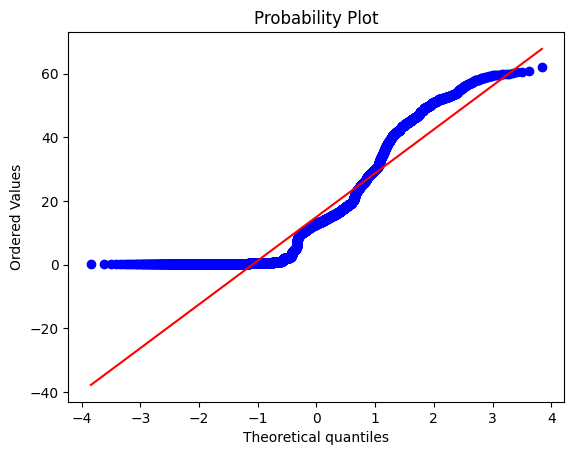

In [9]:
import scipy.stats as stats
import pylab

stats.probplot(df_completo.precio_de_cierre, dist="norm", plot=pylab)
pylab.show()

Utilizamos el gráfico QQ (Quantile-Quantile) para analizar si los datos siguen una distribución normal. Sin embargo, al tratarse de una serie temporal, esta no cumple con dicha distribución debido a tendencias y correlaciones entre observaciones.

Por ello, emplearemos métodos más adecuados para series temporales, como transformaciones (logaritmos o diferenciación), pruebas de estacionariedad (Dickey-Fuller) o modelos como ARIMA, que no requieren normalidad pero permiten capturar patrones y tendencias. Estos enfoques nos ayudarán a realizar inferencias más precisas.

## Visualizacion de los datos

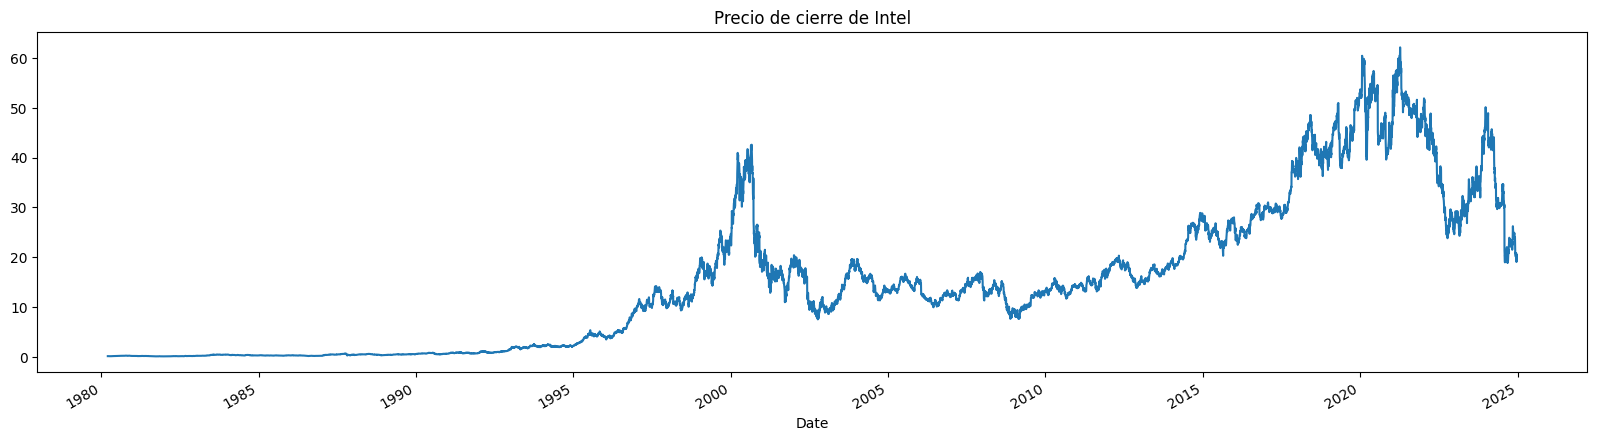

In [10]:
df_completo.precio_de_cierre.plot(figsize=(20,5)) # Mostrando los precios de cierre de Intel
plt.title("Precio de cierre de Intel")
plt.show()

In [11]:
df_completo.describe() # Mostrando las estadisticas del dataset

,precio_de_cierre
count,11289.000000
mean,14.985933
std,14.709644
min,0.120516
25%,0.814571
50%,12.742243
75%,22.617407
max,62.083344


## Comprobando estacionariedad

In [12]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [13]:
# Comprobando la estacionariedad utilizando la prueba Dickey-Fuller
sts.adfuller(df_completo['precio_de_cierre'])

(np.float64(-1.708596081237806),
 np.float64(0.42668904820696824),
 40,
 11248,
 {'1%': np.float64(-3.4309315071996833),
  '5%': np.float64(-2.861796994731415),
  '10%': np.float64(-2.566906793183969)},
 np.float64(16371.904174754007))

Es el valor calculado de la estadística ADF. Este valor se compara con los valores críticos para determinar si podemos rechazar la hipótesis nula de no estacionariedad.

El estadístico ADF (-1.7086) no es menor que los valores críticos para los niveles del 1%, 5% o 10%.

Por lo tanto, como el valor ADF no es menor que los valores críticos entonces no podemos rechazar la hipótesis nula, por ende la serie **no** es **estacionaria**.

## Descomposicion de la serie (tendencia, estacionalidad y residuales)

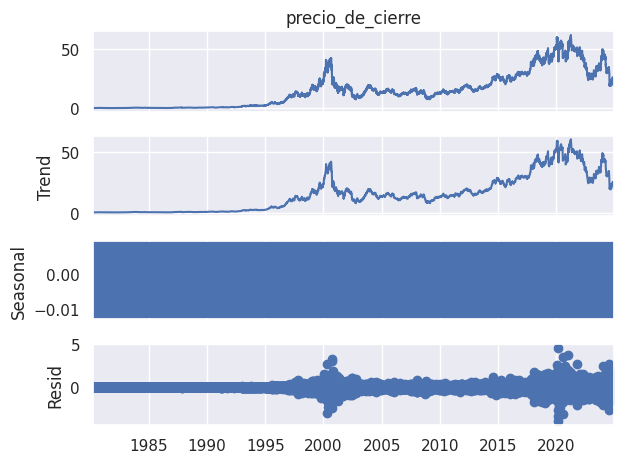

In [14]:
# Mostrando el analisis de tendencia de la grafica en un modelos aditivo
descomposed = seasonal_decompose(df_completo.precio_de_cierre, model='additive', period=5)
descomposed.plot()
plt.show()

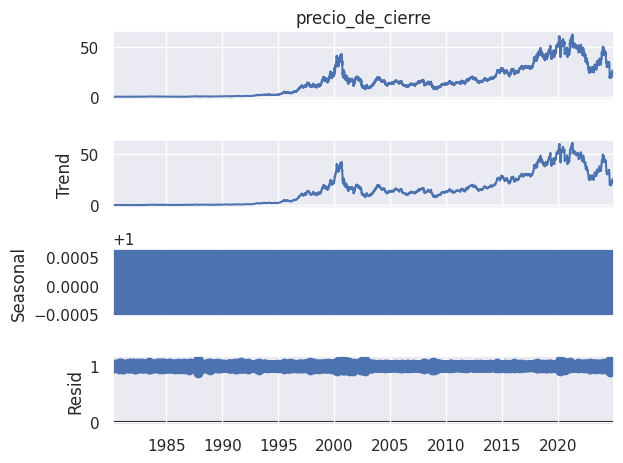

In [15]:
# Mostrando el analisis de tendencia de la grafica en un modelo multiplicativo
descomposed = seasonal_decompose(df_completo.precio_de_cierre, model='multiplicative', period=5)
descomposed.plot()
plt.show()

* **La estacionalidad es insignificante**: Ambos modelos (aditivo y multiplicativo) confirman que los precios de cierre de Intel no tienen un patrón estacional claro. Esto es común en series financieras, donde las fluctuaciones suelen estar más relacionadas con eventos externos, tendencias de mercado, o volatilidad inherente.

* **Tendencia bien representada**: El modelo multiplicativo captura adecuadamente la tendencia general, pero las fluctuaciones residuales indican que todavía hay elementos no explicados que podrían requerir modelos más complejos (ARIMA, GARCH, etc.).

* **Residuos más controlados**: En este caso, el modelo multiplicativo parece manejar mejor la relación entre los componentes, pero sigue siendo insuficiente para explicar ciertos picos y caídas drásticas.

## Filtro de Hodrick-Prescrott (HP)

**Introduccion**

El filtro de Hodrick-Prescott (HP) es una herramienta econométrica que se utiliza principalmente para descomponer una serie temporal económica en dos componentes:

1. Tendencia a largo plazo (ciclo económico estructural)
2. Ciclo o fluctuaciones a corto plazo (componentes cíclicos o ruido)

**Objetivos del filtro HP**

* Identificar ciclos económicos: boom, recesión, recuperación, etc.
* Detectar desviaciones respecto al crecimiento potencial de la economía
* Comparar el desempeño económico real vs. tendencial
* Realizar políticas macroeconómicas más informadas

In [16]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Ahora vamos a aplicar el filtro de Heidrick-Prescott para obtener la tendencia y los ciclos de la serie de tiempo
gdp_cycle, gdp_trend = hpfilter(df_completo.precio_de_cierre, lamb=1600)

# Creamos las columnas de ciclo y tendencia
df_completo['ciclo'] = gdp_cycle
df_completo['tendencia'] = gdp_trend

df_completo.head() # Mostramos las nuevas columnas

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


,precio_de_cierre,ciclo,tendencia
Date,,,
1980-03-17 00:00:00-05:00,0.181500,0.000947,0.180552
1980-03-18 00:00:00-05:00,0.180048,0.000177,0.179871
1980-03-19 00:00:00-05:00,0.184404,0.005213,0.179190
1980-03-20 00:00:00-05:00,0.183678,0.005167,0.178511
1980-03-21 00:00:00-05:00,0.177143,-0.000693,0.177837


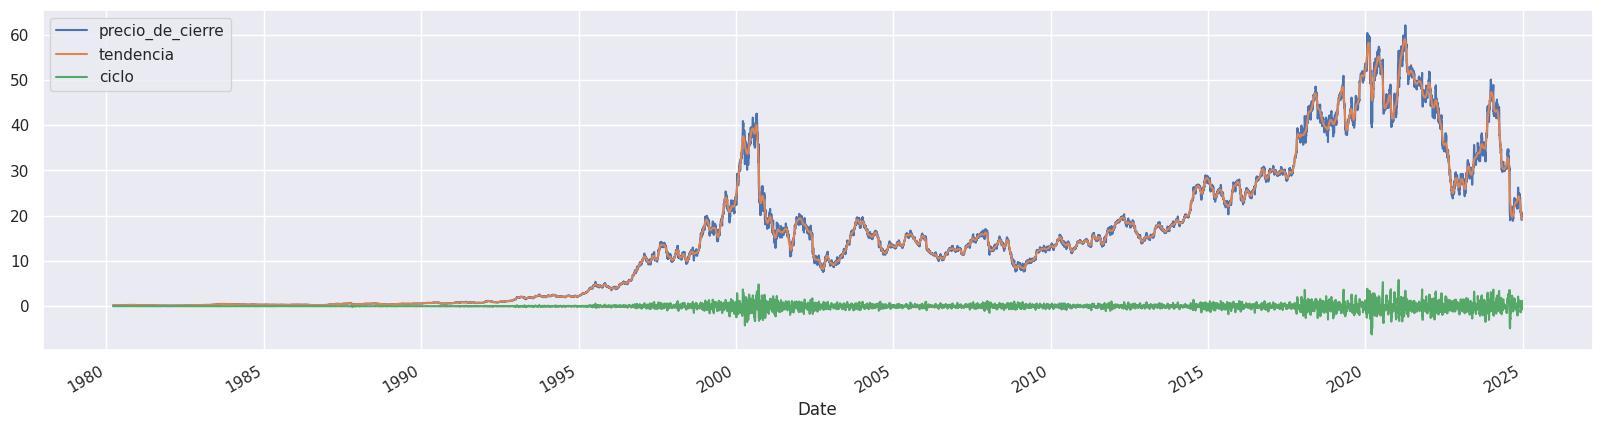

In [17]:
df_completo[['precio_de_cierre', 'tendencia', 'ciclo']].plot(figsize=(20, 5)) # Graficamos los resultados del precio de cierre junto con las variables analizadas
plt.show()

### 1. El Componente Cíclico

El componente cíclico representa las **fluctuaciones de corto a mediano plazo** de una serie de tiempo alrededor de su tendencia de largo plazo. Es el resultado de la extracción de la tendencia de la serie original. Captura las desviaciones de la serie con respecto a su trayectoria suave y subyacente. Su valor puede ser positivo (la serie está por encima de su tendencia) o negativo (la serie está por debajo de su tendencia). Su amplitud y frecuencia reflejan la intensidad y la rapidez de estas desviaciones.

### 2. La Tendencia

La tendencia es el **movimiento suave y de largo plazo** que exhibe una serie de tiempo, una vez que se han eliminado las fluctuaciones cíclicas, estacionales (si las hubiera) e irregulares. Representa la dirección fundamental y sostenida de la serie a lo largo del tiempo, mostrando su trayectoria subyacente de crecimiento o declive. Es la componente de la serie que cambia más lentamente y refleja los factores estructurales o fundamentales que la impulsan en el horizonte temporal analizado.

### 3. La Gráfica Completa

La gráfica completa representa la **descomposición visual de una serie de tiempo** en sus componentes principales: la serie original, su tendencia y su componente cíclico. Permite una visualización simultánea de cómo la serie original se comporta en relación con su trayectoria fundamental (tendencia) y sus desviaciones temporales (ciclo). Al superponer estas tres líneas, la gráfica facilita la identificación de patrones de largo plazo, la magnitud de las fluctuaciones cíclicas y cómo estas interactúan para formar la serie observada.

## Autocorrelación (ACF)

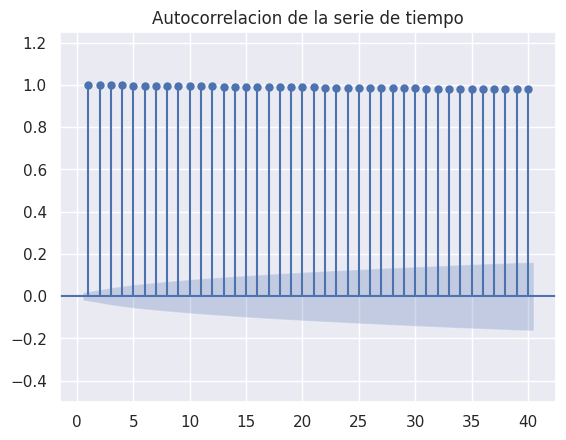

In [18]:
from statsmodels.graphics.tsaplots import plot_acf # Importamos el modulo necesario para hacer la ACF

plot_acf(df_completo['precio_de_cierre'], lags=40, zero=False)
plt.ylim(-0.5,1.25)
plt.title("Autocorrelacion de la serie de tiempo")
plt.show()

El grafico de ACF sugerido nos dice que existe una autocorrelacion positiva entre los datos. Cada punto de la linea representa la cantidad de dias de retraso, por ejemplo el primero es un dia de retraso, el segundo son 2 dias de retraso y asi sucesivamente.

Tambien podemos apreciar una muy tenue tendencia a que los precios bajen en un periodo de 40 dias, esto nos dice que al ser tan tenue podemos considerar que los precios de hace 40 dias no variaran tanto con respecto a los del presente, esto lo tendremos en cuenta para hacer modelos proximamente.

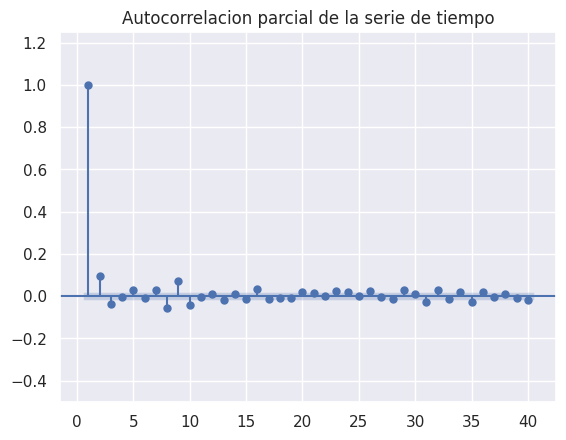

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf # Importamos el modulo necesario para hacer la PACF

plot_pacf(df_completo['precio_de_cierre'], lags=40, zero=False, method=('ols'))
plt.ylim(-0.5,1.25)
plt.title("Autocorrelacion parcial de la serie de tiempo")
plt.show()

# Análisis de la Función de Autocorrelación Parcial (PACF) de los Precios de Intel

Este documento presenta el análisis de la Función de Autocorrelación Parcial (PACF) de los precios de las acciones de Intel, abarcando el período desde 1980 hasta 2025.

---

### ¿Qué es la Función de Autocorrelación Parcial (PACF)?

En el análisis de series de tiempo, la **Función de Autocorrelación Parcial (PACF)** es una herramienta estadística que mide la correlación directa entre una observación en un momento dado ($Y_t$) y una observación anterior ($Y_{t-k}$), *después de haber eliminado la influencia de todas las observaciones intermedias* ($Y_{t-1}, Y_{t-2}, ..., Y_{t-k+1}$).

A diferencia de la Función de Autocorrelación (ACF), que mide la correlación total entre una observación y sus rezagos (incluyendo efectos indirectos), la PACF aísla la correlación "pura" o directa. Esta propiedad la hace especialmente útil para identificar el orden ($p$) de los modelos autoregresivos (AR) en la modelación de series de tiempo (e.g., modelos ARIMA). Para un proceso AR($p$), la PACF típicamente mostrará picos significativos hasta el lag $p$ y luego se "cortará" abruptamente (las barras caerán dentro del intervalo de confianza).

---

**Conclusiones Clave:**

1.  **Significancia en el Lag 1:** Se observa un pico muy pronunciado y significativo en el **lag 1**. Esta barra claramente excede las bandas azules (que representan el intervalo de confianza del 95%), indicando una fuerte correlación parcial entre el precio actual de Intel y su precio en el período inmediatamente anterior.

2.  **Corte Abrupto (Cut-off):** A partir del lag 2 y en adelante, prácticamente todas las barras de autocorrelación parcial caen dentro de las bandas de confianza azules. Esto significa que los coeficientes de autocorrelación parcial para estos lags son estadísticamente no significativos. La correlación entre el precio actual y precios de períodos más lejanos en el tiempo (más allá del lag 1) se considera explicada por la correlación con el lag inmediatamente anterior.

3.  **Indicación de un Proceso AR(1):** El patrón observado en este gráfico (un pico significativo en el lag 1 y un corte abrupto después) es una característica distintiva de un **proceso autoregresivo de orden 1 (AR(1))**. Esto sugiere que la mejor manera de modelar la dependencia lineal de los precios de Intel es considerando que el precio actual depende directamente solo del precio del período anterior.

**Implicaciones para el Modelado:**

Basado en este análisis de la PACF, se podría inferir que un modelo AR(1) podría ser un buen punto de partida para modelar la dinámica de los precios de Intel. Es importante complementar este análisis con el de la Función de Autocorrelación (ACF) y pruebas de estacionariedad para confirmar la elección del modelo adecuado.

## Conclusiones

# 🧠 Análisis histórico del precio de cierre de Intel (1980 - 2025)

Este análisis se basa en el comportamiento histórico del precio de las acciones de Intel a lo largo de varias décadas. A continuación se describe la evolución por periodos:

---

## 📅 1990s – Auge por los procesadores Pentium

- Intel dominó el mercado con sus procesadores **Pentium**, lo que impulsó una enorme demanda de computadoras personales (PC).
- La revolución de la computación doméstica elevó el precio de sus acciones.
- Fue un **motor clave de la revolución informática**.

---

## 📅 2000s – Burbuja punto com y declive

- En el año 2000, el precio alcanzó un **pico histórico** impulsado por la especulación en el sector tecnológico.
- Sin embargo, la **burbuja .com estalló**, lo que provocó una caída abrupta en muchas tecnológicas, incluida Intel.
- Pérdida de confianza en el mercado e incertidumbre.

---

## 📅 2003 a 2015 – Estancamiento tecnológico

- Aunque la empresa seguía operando con ganancias, hubo una **falta de innovación disruptiva**.
- La llegada de los **smartphones y tablets debilitó el mercado de PCs**, reduciendo el crecimiento de la compañía.
- **Intel no logró adaptarse a tiempo al boom móvil**, como sí lo hicieron otras empresas (Apple, Qualcomm).

---

## 📅 2016 a 2020 – Resurgimiento por centros de datos

- Intel se benefició del crecimiento de la **computación en la nube**, los **servidores** y **data centers**.
- Fue líder en la infraestructura tecnológica que soporta la digitalización global.
- Se convirtió en el **rey de los centros de datos**.

---

## 📅 2020 a 2025 – Competencia feroz y pérdida de liderazgo

- **Apple dejó de usar chips Intel** para sus Mac, apostando por sus propios chips (M1 y sucesores).
- La empresa **quedó rezagada en la fabricación** de chips avanzados frente a competidores como TSMC.
- **Nvidia** y **AMD** tomaron protagonismo en sectores clave como inteligencia artificial, gaming y HPC (computación de alto rendimiento).
- El precio de las acciones **cayó drásticamente** debido a una pérdida de confianza e innovación.

---

## 📉 Conclusión

Intel ha sido un actor clave en la historia de la tecnología, pero su trayectoria también refleja cómo la **falta de adaptación tecnológica y la fuerte competencia pueden erosionar el liderazgo de décadas**. No obstante, aún cuenta con recursos para reinventarse si toma decisiones estratégicas a futuro.

